# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('https://raw.githubusercontent.com/vinisavordelli/exercicios_ebac/main/Ci%C3%AAncia%20de%20Dados/Exercicio_5/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
# Corta a coluna de latitude em duas regiões. Como o mundo é uma esfera, do centro da terra ele pode variar noventa graus para cima ou para baixo.
sinasc_regions = pd.cut(sinasc_raw['munResLat'], [-90, -10.5, 90], labels=['Sul', 'Norte'])
sinasc_1 = sinasc_raw
# adiciona a coluna de regiões ao dataframe
sinasc_1['Regiao'] = sinasc_regions
sinasc_1.pivot_table(index='Regiao', values=['IDADEMAE', 'IDADEPAI'], aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

sum                 mean                 min               max  \
       IDADEMAE  IDADEPAI   IDADEMAE   IDADEPAI IDADEMAE IDADEPAI IDADEMAE   
Regiao                                                                       
Sul      340143  198460.0  26.178943  30.903145       12     15.0       53   
Norte    365094   38038.0  26.014964  32.126689       11     16.0       52   

                  median                std                  var             
       IDADEPAI IDADEMAE IDADEPAI  IDADEMAE  IDADEPAI   IDADEMAE   IDADEPAI  
Regiao                                                                       
Sul        86.0       26     30.0  6.320385  7.707002  39.947272  59.397875  
Norte      73.0       25     31.0  6.447663  8.034214  41.572355  64.548602

### Observações

Os dados não apresentam muita coisa sozinhos, porém podemos notar que entre os generos dos pais, apesar da grande diferença na idade máxima, a idade média no norte é mais próxima e os dados são menos dispersos e mais concentrados em torno da média.

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [5]:
sinasc_1['Area'] = pd.cut(sinasc_1['munResArea'], [0, 3000, 10000000], labels=['Pequena', 'Grande'])
sinasc_1.pivot_table(index='Area', values=['PESO', 'CONSULTAS'], aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var']).round(2)

sum                mean                min            max        \
        CONSULTAS      PESO CONSULTAS     PESO CONSULTAS PESO CONSULTAS  PESO   
Area                                                                            
Pequena     19520  16796616      3.74  3218.36         1  258         9  5720   
Grande      77142  70857126      3.54  3249.13         1  292         9  5985   

           median             std               var             
        CONSULTAS  PESO CONSULTAS    PESO CONSULTAS       PESO  
Area                                                            
Pequena         4  3245      0.61  531.58      0.37  282580.60  
Grande          4  3280      0.82  547.72      0.67  299993.45

### Observações

Nota-se que cidades menores possuem mais consultas por uma pequena margem, que se caso aprofundasse o estudo, poderia ser explicado por cidades menores serem cidades urbanas, com mais acesso a atendimentos médicos, por exemplo. Ou então, caso isso for o contrario (cidades grandes são as urbanas), um possível argumento seria a disparidade de renda e o alto custo de vida em cidades urbanas, o que poderia dificultar o acesso a atendimentos médicos para as classes sociais mais baixas.

No entanto, o desvio padrão e variância são maiores nas cidades grandes, e a primeira impressão que se é que as cidades grandes (em area) são as urbanas, possuindo uma maior população e por consequência, uma maior dispersão de dados.

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
mediana_alt = sinasc_1['munResAlt'].median()
sinasc_1['Altitude'] = pd.cut(sinasc_1['munResAlt'], [0, mediana_alt, 10000000], labels=['Baixa', 'Alta'])

sinasc_1.groupby('Altitude')['QTDPARTNOR', 'QTDPARTCES'].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


/tmp/ipykernel_740840/1803916833.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_1.groupby('Altitude')['QTDPARTNOR', 'QTDPARTCES'].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


QTDPARTNOR                                                  \
                sum      mean  min   max median       std       var   
Altitude                                                              
Baixa        9307.0  0.780527  0.0  40.0    0.0  1.362645  1.856801   
Alta         5264.0  0.398064  0.0  41.0    0.0  1.018270  1.036874   

         QTDPARTCES                                                  
                sum      mean  min   max median       std       var  
Altitude                                                             
Baixa        5697.0  0.475225  0.0  12.0    0.0  0.736925  0.543058  
Alta         7439.0  0.561519  0.0  12.0    0.0  0.752433  0.566156

### Observações

Podemos observar que cidades com menores altitudes tendem a ter partos normais enquanto cidades com maiores altitudes tendem a ter partos cesáreos. Um estudo mais aprofundada sobre a demografia do estado poderia explicar melhor essa relação que pode ter a ver com onde estão as zona rurais e urbanas do estado.

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia


existe 1 cidades sem região


<Axes: xlabel='DTNASC'>

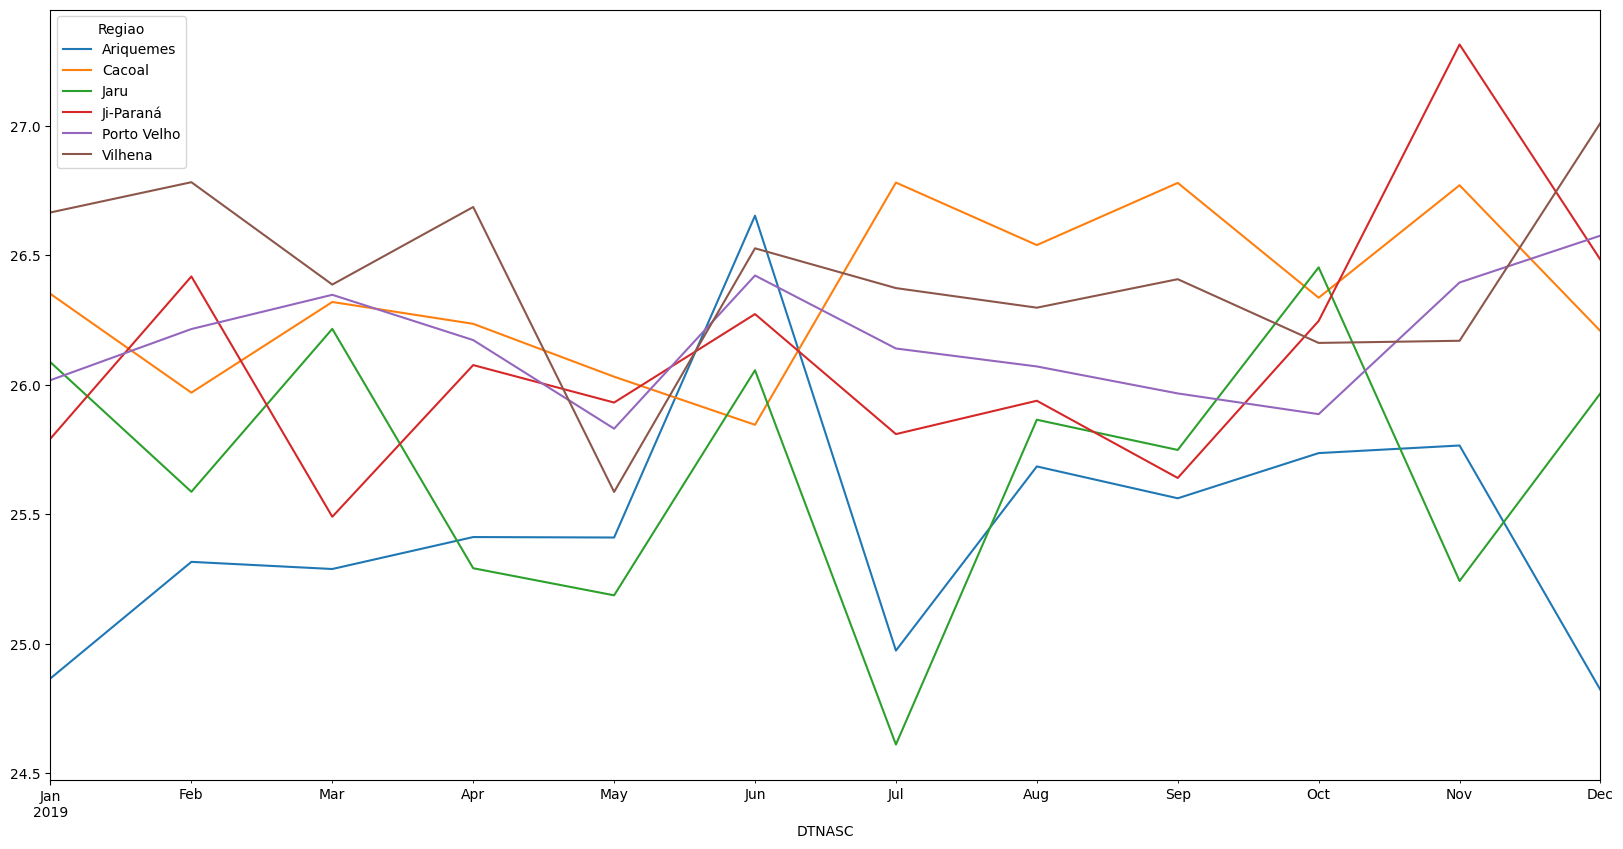

In [7]:
mun_regioes = pd.read_csv('regioes_imediatas_ro.csv')
mun_regioes['Municipio'] = mun_regioes['Municipio'].str.strip()
mun_regioes['Regiao'] = mun_regioes['Regiao'].str.strip()
mun_regioes = mun_regioes.set_index('Municipio').to_dict()['Regiao']

sinasc_1['Regiao'] = sinasc_1['munResNome'].map(mun_regioes)
print(f'existe {sinasc_1["Regiao"].isna().sum()} cidades sem região')
sinasc_1['Regiao'].dropna()
sinasc_1['DTNASC'] = pd.to_datetime(sinasc_1['DTNASC'])
sinasc_2 = sinasc_1[['DTNASC', 'Regiao', 'IDADEMAE']]
sinasc_2.groupby(['Regiao', pd.Grouper(key='DTNASC', freq='M')])['IDADEMAE'].mean().unstack('Regiao').plot(figsize=(20, 10))

As regiões Arquimenes e Jaru aparentam ter mães mais novas, enquanto vilhena e cacoal mais mais velhas quando consideramos a média de idades das mães ao longo do ano. 

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [8]:
idh = pd.read_csv('idh.csv')

mapping = {
    'IDH-M muito alto': 'muito alto',
    'IDH-M alto': 'alto',
    'IDH-M médio': 'medio',
    'IDH-M baixo': 'baixo',
    'IDH-M muito baixo': 'muito baixo'
}

idh_2 = idh.set_index('IDH-M')
idh_2.groupby(mapping).count()

,MUNICIPIO,IDH_MUNICIPAL,IDH_RENDA,IDH_LONGEVIDADE,IDH_EDUCACAO
IDH-M,,,,,
alto,7,7,7,7,7
baixo,9,9,9,9,9
medio,36,36,36,36,36


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [32]:
ifdm = pd.read_csv('IFDM.csv')
ifdm_2 = ifdm.set_index('POSICAO')

mapping = {
    'Desenvolvimento alto': 'alto',
    'Desenvolvimento moderado': 'em ascensao',
    'Desenvolvimento regular': 'medio',
    'Desenvolvimento baixo': 'baixo'
}

ifdm_2.groupby(mapping).count()

,MUNICIPIO,IFDM
POSICAO,,
em ascensao,26,26
medio,26,26


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [10]:
pib = pd.read_csv('PIB.csv')
pib['PIB'] = pib['PIB'].str.replace(' ', '').astype(int)
pib['Classificacao'] = pd.cut(pib['PIB'], [0, 100000 , 200000, 300000, 500000, 1000000, 100000000], labels=['abaixo de 100 M', '100 M a 200 M', '200 M a 300 M', '300 M a 500 M', '500 M a 1 B', 'acima de 1 B'])
pib_2 = pib.set_index('Classificacao')

mapping = {
    'abaixo de 100 M': 'baixo',
    '100 M a 200 M': 'medio',
    '200 M a 300 M': 'medio',
    '300 M a 500 M': 'alto',
    '500 M a 1 B': 'alto',
    'acima de 1 B': 'muito alto'
}

pib_2.groupby(mapping).count()

,MUNICIPIO,PIB
Classificacao,,
alto,16,16
baixo,7,7
medio,19,19
muito alto,8,8


<Axes: xlabel='Regiao', ylabel='IFDM'>

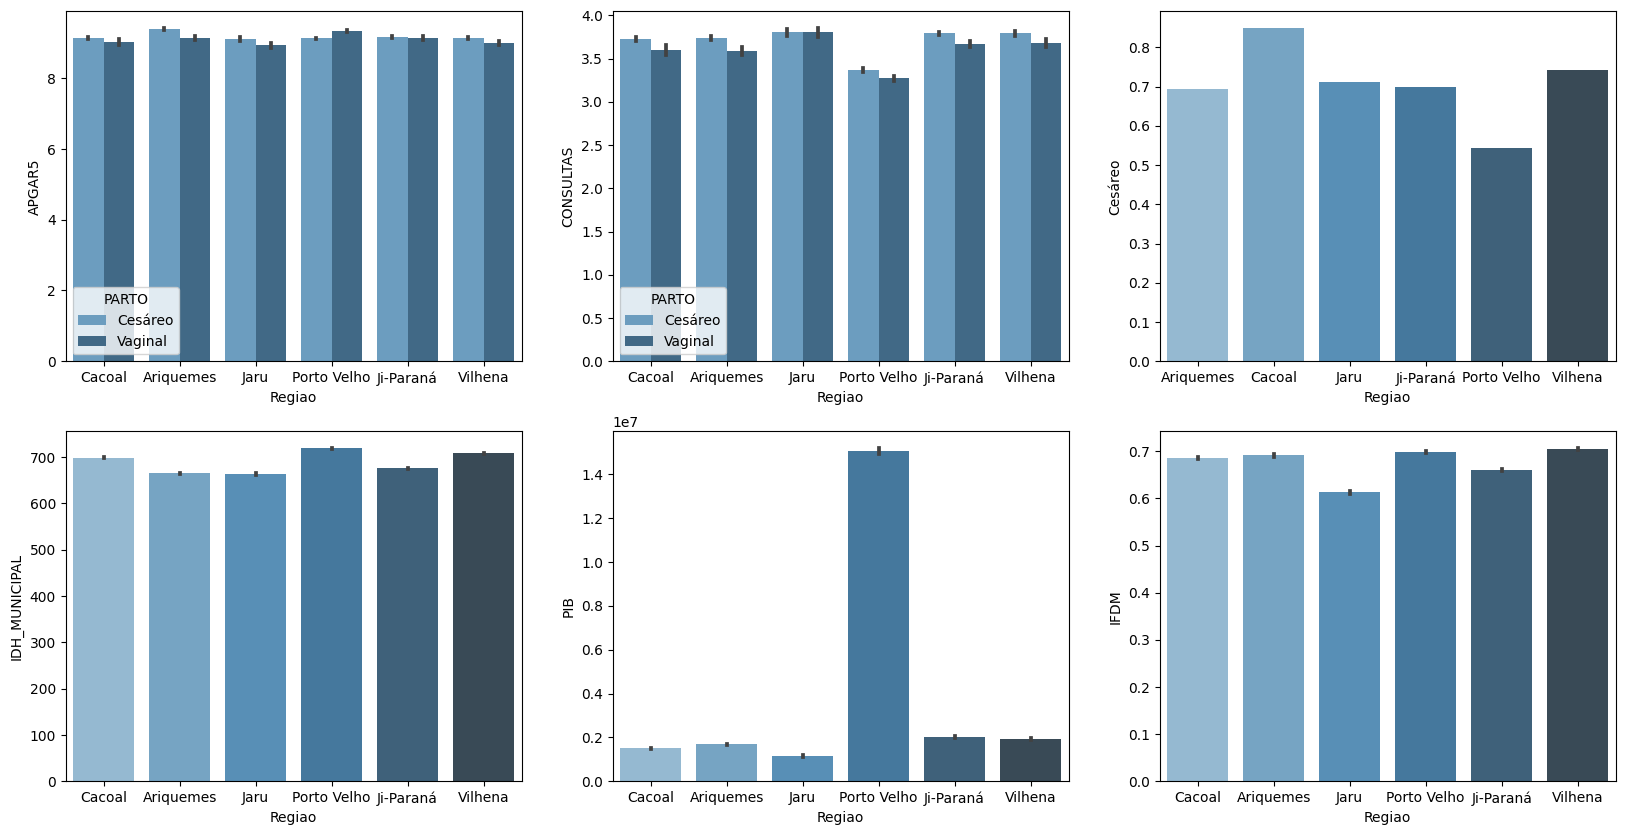

In [70]:
pib_3 = pib.set_index('MUNICIPIO')
ifdm_3 = ifdm.set_index('MUNICIPIO')
idh_3 = idh.set_index('MUNICIPIO')

sinasc_rating = sinasc_1.merge(pib_3, left_on='munResNome', right_on='MUNICIPIO').merge(ifdm_3, left_on='munResNome', right_on='MUNICIPIO').merge(idh_3, left_on='munResNome', right_on='MUNICIPIO')
sinasc_rating = sinasc_rating[['IDH_MUNICIPAL','IDH-M', 'IFDM', 'PIB', 'munResNome', 'Regiao', 'IDADEMAE', 'ESCMAE', 'CONSULTAS', 'GESTACAO', 'APGAR1', 'APGAR5', 'PESO', 'QTDPARTNOR', 'QTDPARTCES', 'PARTO']]

fig, axes = plt.subplots(3, 3)
fig.set_size_inches(20, 10)

parto_regiao = pd.crosstab(sinasc_rating['Regiao'], sinasc_rating['PARTO'], normalize='index').reset_index()

sns.barplot(x='Regiao', y='APGAR5', hue='PARTO', data=sinasc_rating, estimator='mean', ax=axes[0, 0], palette='Blues_d')
sns.barplot(x='Regiao', y='CONSULTAS', hue='PARTO', data=sinasc_rating, estimator='mean', ax=axes[0, 1], palette='Blues_d')
sns.barplot(data=parto_regiao, x='Regiao', y='Cesáreo', ax=axes[0, 2], palette='Blues_d')
sns.barplot(x='Regiao', y='IDH_MUNICIPAL', estimator='mean', data=sinasc_rating, ax=axes[2, 0], palette='Blues_d')
sns.barplot(x='Regiao', y='PIB', estimator='mean', data=sinasc_rating, ax=axes[2, 1], palette='Blues_d')
sns.barplot(x='Regiao', y='IFDM', estimator='mean', data=sinasc_rating, ax=axes[2, 2], palette='Blues_d')




### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Observa-se que nas regiões com maior indice de desenvolvimento, os indicies de apgar5 são maiores, assim como a média de partos normais. No entanto, a região que tem a maior média de consultas é onde ocorre os menores índices de IFDM.

Quanto aos partos normais e/ou cesáreos, parece que partos vaginais demandam menos consultas, e acontecem mais frequentemente em regiões com maior IFDM.